# ETL/EDA de datasets a nivel nacional

In [103]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Configura la opción de visualización para valores decimales en lugar de notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

## Datos de conexion a internet a nivel nacional

In [104]:
#Leer los datos de los CSVs nacionales sobre conexion a internet
nat_num_access = pd.read_csv('datasets/internet/nacional_acceso_cada_100_hogares.csv', encoding='utf-8')
nat_conn_type = pd.read_csv('datasets/internet/nacional_tecnologia_de_conexion.csv', encoding='utf-8')
nat_vel_range = pd.read_csv('datasets/internet/nacional_rango_de_velocidad.csv', encoding='utf-8')
nat_vel_mean = pd.read_csv('datasets/internet/nacional_velocidad_media.csv', encoding='utf-8')

### Cantidad de accesos por periodo de tiempo

`Dataframe: nat_num_access`

Este dataframe contiene información sobre el acceso que tienen los ciudadanos de la Republica Argentina, estimado cada 100 hogares y cada 100 habitantes.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Accesos por hogares: cantidad de accesos cada 100 hogares en el periodo de tiempo especificado.
- Accesos por habitantes: cantidad de accesos cada 100 habitantes en el periodo de tiempo especificado.

In [105]:
#Tamaño del dataframe
nat_num_access.shape

(33, 5)

In [106]:
#Resumen de primeros datos
nat_num_access.head(3)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,1,"73,88","23,05",Ene-Mar 2022
1,2021,4,"73,18","22,81",Oct-Dic 2021
2,2021,3,"70,58","21,98",Jul-Sept 2021


In [107]:
#Reemplzar ',' con '.'
nat_num_access[['Accesos por cada 100 hogares','Accesos por cada 100 hab']] = nat_num_access[['Accesos por cada 100 hogares','Accesos por cada 100 hab']].applymap(lambda x: str(x).replace(',','.'))

In [108]:
#Valores nulos y el tipo de datos de las series
print(nat_num_access.isnull().sum())
print(nat_num_access.dtypes)

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64
Año                              int64
Trimestre                        int64
Accesos por cada 100 hogares    object
Accesos por cada 100 hab        object
Periodo                         object
dtype: object


In [109]:
#Transformar str a float
nat_num_access[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']] = nat_num_access[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].astype(float)

In [110]:
#Eliminar columnas innecesarias
nat_num_access = nat_num_access.drop(['Periodo','Trimestre'], axis=1)

In [111]:
#Agrupar datos por año promediando trimestres
nat_num_access = nat_num_access.groupby('Año').mean().reset_index()

In [112]:
nat_num_access.describe()

,Año,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,9.00,9.00,9.00
mean,2018.00,60.52,18.69
std,2.74,8.37,2.74
min,2014.00,50.14,15.26
25%,2016.00,53.22,16.33
50%,2018.00,60.02,18.52
75%,2020.00,65.25,20.25
max,2022.00,73.88,23.05


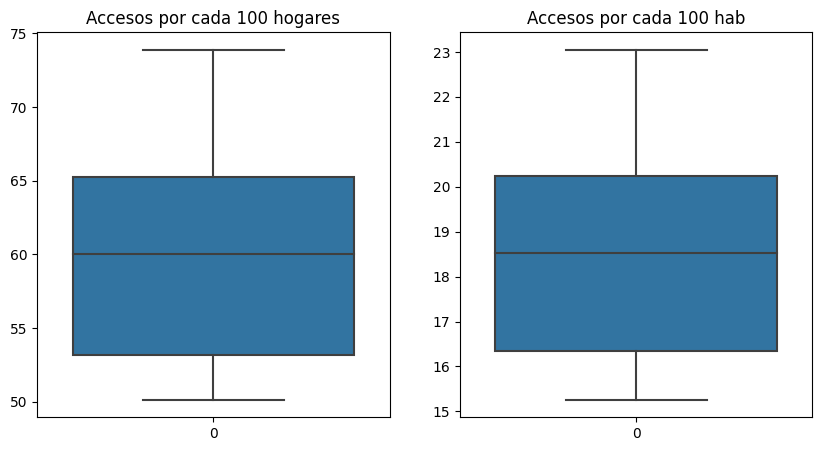

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Primer subplot - Boxplot de Columna1
sns.boxplot(data=nat_num_access['Accesos por cada 100 hogares'], ax=axes[0])
axes[0].set_title('Accesos por cada 100 hogares')

# Segundo subplot - Boxplot de Columna2
sns.boxplot(data=nat_num_access['Accesos por cada 100 hab'], ax=axes[1])
axes[1].set_title('Accesos por cada 100 hab')

plt.show()

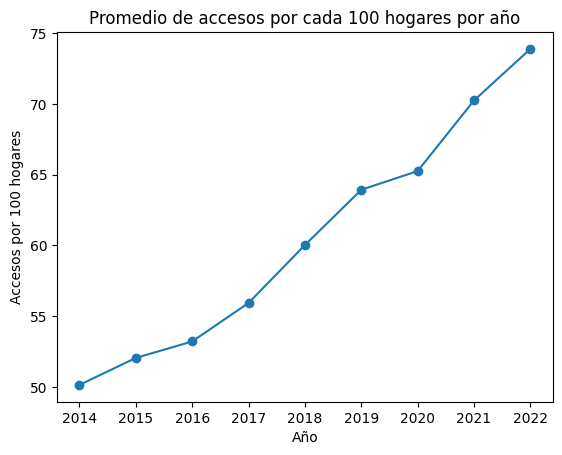

In [114]:
#Creacion del gráfico de líneas
plt.plot(nat_num_access['Año'], nat_num_access['Accesos por cada 100 hogares'], marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Accesos por 100 hogares')
plt.title('Promedio de accesos por cada 100 hogares por año')
plt.show()

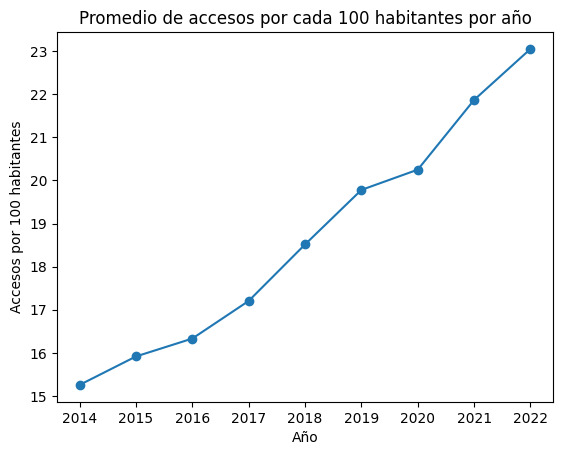

In [115]:
#Creacion del gráfico de líneas
plt.plot(nat_num_access['Año'], nat_num_access['Accesos por cada 100 hab'], marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Accesos por 100 habitantes')
plt.title('Promedio de accesos por cada 100 habitantes por año')
plt.show()

#### Conclusion de graficos por cada 100 hogares y cada 100 habitantes

`Graficos de boxplot similares y tendencia similar en los graficos de linea`

- Relacion entre hogares e individuos: estos graficos indican que en promedio, hay una intima relacion en cuanto al uso del servicio de internet entre la cantidad de hogares y la población que vive en estos.

- Densidad: tambien podemos admitir que en areas con una alta densidad de hogares, existe una alta densidad de poblacion que hace uso de servicio de internet y viceversa.

- Infraestructura: se puede ver reflejado la disponibilidad de acceso a Internet. Es posible que las áreas con una buena infraestructura de acceso a Internet tengan tasas medianamente altas de servicio, asi tambien las zonas mas pobres o aisladas sufren lo contrario.

- Crecimiento: no podemos dejar de lado el obvio resultado del analisis, ya que lo que se ve mas reflejado es el gran incremento de la posibilidad de acceder a un servicio de internet al corto plazo de poco años.

Una caracteristica importante a resaltar de estos campos de datos es que sus medidas de tendencia central son sumanente cercanas sino iguales.

---

### Cantidad de usuarios por tecnologia de conexion por periodos de tiempo

`Dataframe: nat_conn_type`

Este dataframe contiene información sobre el tipo de conexion que tienen los ciudadanos de la Republica Argentina, estimado en cantidades por periodo de tiempo.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- ADSL: es una tecnología de acceso a Internet que utiliza las líneas telefónicas existentes para proporcionar una conexión de banda ancha asmetrica.
- Cablemodem: es una tecnología de acceso a Internet que utiliza las redes de televisión por cable existentes para ofrecer conexión de banda ancha.
- Fibra óptica: es una tecnología de acceso a Internet que utiliza cables de fibra óptica para transmitir datos en forma de pulsos de luz.
- Wireless: es una tecnologia de conexion inalámbrica a Internet, también conocidas como redes Wi-Fi. 
- Otros: otro tipo de tecnologias de conexion a internet.
- Total: sumatoria de la cantidad de todos los tipos de conexiones por periodo de tiempo.
- Periodo: trimestre detallado por meses y año especifico.

In [116]:
#Tamaño del dataframe
nat_conn_type.shape

(33, 9)

In [117]:
#Resume de primeros datos
nat_conn_type.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,1,1.533.240,6.073.426,2.219.533,545.81,252.00,10.624.009,Ene-Mar 2022
1,2021,4,1.657.615,5.984.240,2.072.236,523.11,252.60,10.489.794,Oct-Dic 2021
2,2021,3,1.950.631,5.826.257,1.566.048,492.42,250.19,10.085.541,Jul-Sept 2021


In [118]:
#Reemplazar '.' con ''
nat_conn_type[['ADSL','Cablemodem','Fibra óptica','Total']] = nat_conn_type[['ADSL','Cablemodem','Fibra óptica','Total']].applymap(lambda x: str(x).replace('.', ''))

In [119]:
#Valores nulos y tipo de datos de las series
print(nat_conn_type.isnull().sum())
print(nat_conn_type.dtypes)

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
Año               int64
Trimestre         int64
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
Periodo          object
dtype: object


In [120]:
#Transformar str a float
nat_conn_type[['ADSL','Cablemodem','Fibra óptica','Total']] = nat_conn_type[['ADSL','Cablemodem','Fibra óptica','Total']].astype(float)

In [121]:
#Eliminar columnas innecesarias
nat_conn_type = nat_conn_type.drop(['Periodo','Trimestre'], axis=1)

In [122]:
#Agrupar datos por año promediando trimestres
nat_conn_type = nat_conn_type.groupby('Año').mean().reset_index()

In [123]:
nat_conn_type.describe()

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,2018.00,3004194.50,4180559.25,748082.47,255.94,151.37,8340145.31
std,2.74,880730.13,1303997.51,764393.97,184.32,88.54,1442084.56
min,2014.00,1533240.00,2493771.75,151215.50,76.31,56.91,6514158.25
25%,2016.00,2268207.00,3044272.00,170031.75,84.35,71.67,7124014.50
50%,2018.00,3495496.00,4142818.00,269781.00,217.51,116.44,8242046.75
75%,2020.00,3721187.50,5134991.00,1159155.00,390.95,239.50,9192810.75
max,2022.00,3778923.50,6073426.00,2219533.00,545.81,252.00,10624009.00


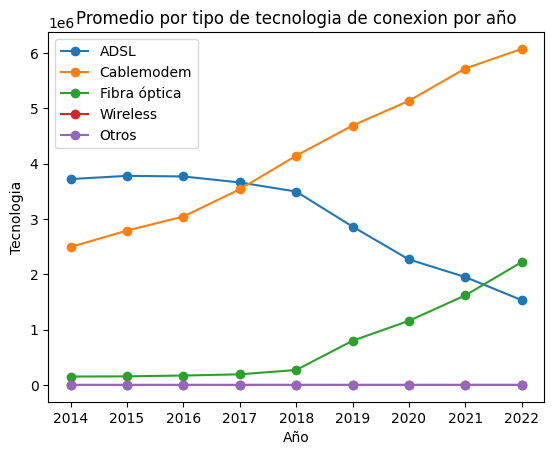

In [124]:
#Creacion del gráfico de líneas
plt.plot(nat_conn_type['Año'], nat_conn_type['ADSL'], marker='o', linestyle='-', label='ADSL')
plt.plot(nat_conn_type['Año'], nat_conn_type['Cablemodem'], marker='o', linestyle='-', label='Cablemodem')
plt.plot(nat_conn_type['Año'], nat_conn_type['Fibra óptica'], marker='o', linestyle='-',label='Fibra óptica')
plt.plot(nat_conn_type['Año'], nat_conn_type['Wireless'], marker='o', linestyle='-', label='Wireless')
plt.plot(nat_conn_type['Año'], nat_conn_type['Otros'], marker='o', linestyle='-', label='Otros')
plt.xlabel('Año')
plt.ylabel('Tecnologia')
plt.title('Promedio por tipo de tecnologia de conexion por año')
plt.legend()
plt.show()

#### Conclusion de grafico por tipo de conexion

`Grafico de linea que sugiere un cambio de tecnologias claves`

- Preferencia tecnologica: el descenso de la tecnologia ADSL y el crecimiento del cablemodem se puede deber al tipo de promociones que ofrecen los sistemas de internet y television por cable incluidos (factor un tanto economico). Asi tambien podria deberse al impacto social de los telefonos moviles sobre las lineas ADSL que tambien ofrecen servicio de telefonia fija.

- Infraestructura: el crecimiento del cablemodem y la fibra optica sugieren que se están realizando inversiones en infraestructura de banda ancha para ofrecer un mejor servicio de internet. Estas mejoras tambien podrian estar impulsando el cambio en la preferencia tecnologica de los usuarios.

- Mayores velocidades: el aumento gradual de la fibra optica puede indicar una mayor demanda de velocidades de conexion ultra rapidas. Ademas la capacidad de proporcionar velocidades de conexion simetricas (velocidad similar de bajada y de subida) lo que la convierte en una opcion atractiva para las mayoria de usuario recurrentes de videojuegos como de aplicaciones de alto rendimiento.

---

### Cantidad de usuarios por velocidad de conexion por periodos de tiempo 

`Dataframe: nat_vel_range`

Este dataframe contiene información sobre la velocidad de conexion que tienen los ciudadanos de la Republica Argentina, estimado en cantidades por periodo de tiempo.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- 0Mbps hasta mas de 30Mbps: velocidad maxima de conexion a internet 
- Otros: otro velocidades de conexion a internet.
- Total: sumatoria de la cantidad de todas las velocidades por periodo de tiempo.

In [125]:
#Tamaño de dataframe
nat_vel_range.shape

(33, 12)

In [126]:
#Resumen de primeros datos
nat_vel_range.head(3)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,1,34.89,104.84,1.263.273,1.209.148,967.508,509.830,6.336.187,198.33,10.624.009,NaN
1,2021,4,41.26,28.52,1.413.208,1.245.333,976.539,558.358,6.032.322,194.25,10.489.794,NaN
2,2021,3,40.17,41.44,2.550.229,1.095.772,710.122,536.364,4.948.174,163.27,10.085.541,NaN


In [127]:
#Renombrar columnas
nat_vel_range = nat_vel_range.rename(columns={'Hasta 512 kbps':'0 - 0.512Mbps',
                        'Entre 512 Kbps y 1 Mbps':'0.512Mbps - 1Mbps',
                        'Entre 1 Mbps y 6 Mbps':'1Mbps - 6Mbps',
                        'Entre 6 Mbps y 10 Mbps':'6Mbps - 10Mbps',
                        'Entre 10 Mbps y 20 Mbps':'10Mbps - 20Mbps',
                        'Entre 20 Mbps y 30 Mbps':'20Mbps - 30Mbps',
                        'Más de 30 Mbps':'+30Mbps',
                        'OTROS':'Otros'})

In [128]:
#Reemplazar '.' con ''
nat_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']] = nat_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']].applymap(lambda x: str(x).replace('.', ''))

In [129]:
#Valores nulos y tipos de datos de las series
print(nat_vel_range.isnull().sum())
print(nat_vel_range.dtypes)

Año                   0
Trimestre             0
0 - 0.512Mbps         0
0.512Mbps - 1Mbps     0
1Mbps - 6Mbps         0
6Mbps - 10Mbps        0
10Mbps - 20Mbps       0
20Mbps - 30Mbps       0
+30Mbps               0
Otros                 0
Total                 0
Unnamed: 11          33
dtype: int64
Año                    int64
Trimestre              int64
0 - 0.512Mbps         object
0.512Mbps - 1Mbps     object
1Mbps - 6Mbps         object
6Mbps - 10Mbps        object
10Mbps - 20Mbps       object
20Mbps - 30Mbps       object
+30Mbps               object
Otros                 object
Total                 object
Unnamed: 11          float64
dtype: object


In [130]:
#Tranformar de str a float
nat_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']] = nat_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']].astype(float)

In [131]:
#Eliminar columnas innecesarias
nat_vel_range = nat_vel_range.drop(['Trimestre','Unnamed: 11'], axis=1)

In [132]:
#Agrupar datos por año promediando trimestres
nat_vel_range = nat_vel_range.groupby('Año').mean().reset_index()

In [133]:
nat_vel_range.describe()

,Año,0 - 0.512Mbps,0.512Mbps - 1Mbps,1Mbps - 6Mbps,6Mbps - 10Mbps,10Mbps - 20Mbps,20Mbps - 30Mbps,+30Mbps,Otros,Total
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,2018.00,33848.31,213602.64,3562838.69,908100.47,927443.44,505448.28,1993950.78,105136.92,8299244.78
std,2.74,33296.59,214339.51,1365094.36,253919.06,473363.89,464038.03,2466878.31,91920.12,1486871.04
min,2014.00,3489.00,10484.00,1263273.00,375123.50,176784.25,1425.25,12876.75,0.00,6366186.75
25%,2016.00,19270.50,38414.00,2640485.75,866906.00,779467.00,98931.75,30503.00,0.00,7073592.50
50%,2018.00,28816.00,214164.50,3335133.75,956741.25,846160.50,509830.00,491681.00,161349.50,8242046.75
75%,2020.00,35391.50,238128.25,4873064.75,1047253.25,1073116.25,584510.75,3876269.75,177921.50,9192810.75
max,2022.00,116709.25,626698.50,5129465.25,1209148.00,1763424.25,1281087.50,6336187.00,198333.00,10624009.00


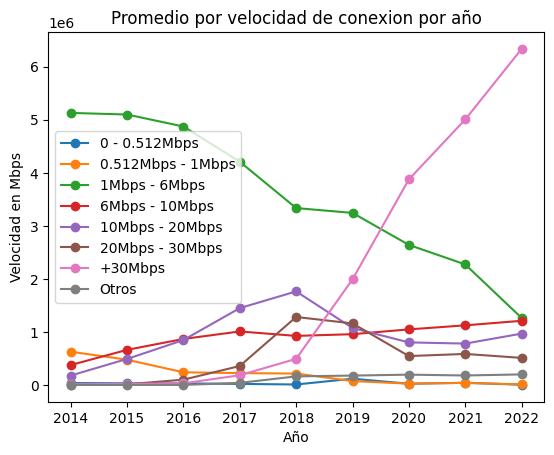

In [134]:
#Creacion del gráfico de líneas
plt.plot(nat_vel_range['Año'], nat_vel_range['0 - 0.512Mbps'], marker='o', linestyle='-', label='0 - 0.512Mbps')
plt.plot(nat_vel_range['Año'], nat_vel_range['0.512Mbps - 1Mbps'], marker='o', linestyle='-', label='0.512Mbps - 1Mbps')
plt.plot(nat_vel_range['Año'], nat_vel_range['1Mbps - 6Mbps'], marker='o', linestyle='-',label='1Mbps - 6Mbps')
plt.plot(nat_vel_range['Año'], nat_vel_range['6Mbps - 10Mbps'], marker='o', linestyle='-', label='6Mbps - 10Mbps')
plt.plot(nat_vel_range['Año'], nat_vel_range['10Mbps - 20Mbps'], marker='o', linestyle='-', label='10Mbps - 20Mbps')
plt.plot(nat_vel_range['Año'], nat_vel_range['20Mbps - 30Mbps'], marker='o', linestyle='-', label='20Mbps - 30Mbps')
plt.plot(nat_vel_range['Año'], nat_vel_range['+30Mbps'], marker='o', linestyle='-', label='+30Mbps')
plt.plot(nat_vel_range['Año'], nat_vel_range['Otros'], marker='o', linestyle='-', label='Otros')
plt.xlabel('Año')
plt.ylabel('Velocidad en Mbps')
plt.title('Promedio por velocidad de conexion por año')
plt.legend()
plt.show()

#### Conclusion de grafico por velocidad de conexion

`Grafico de linea que sugiere un aumento de conexion mas rapidas`

- Mas velocidad: el descenso y encuentro de velocidad intermedias podrian indicar una tendencia la compra de mas ancho de banda tanto por necesidad como cantidad de promociones para incrementar la velocidad por parte de las empresas prestadoras. Tambien la creciente demanda de servicios en linea como la transmision de video en alta definicion, juegos online y transferencia de grandes archivos.

- Brecha digital: asi como vemos una necesidad de velocidades mayores tambien podemos apreciar la persistencia de velocidades mas bajas. Esto puede estar relacionado con factores como la disponibilidad de infraestructura de banda ancha y la ubicación geográfica.

- Infraestructura: la explicacion de este punto es similar a la conclusion sobre los tipos de conexion mas requeridos en la actualidad. Para ello a continuacion vamos a demostrar la relacion entre velocidad y tipo de conexion con una matriz de correlacion.


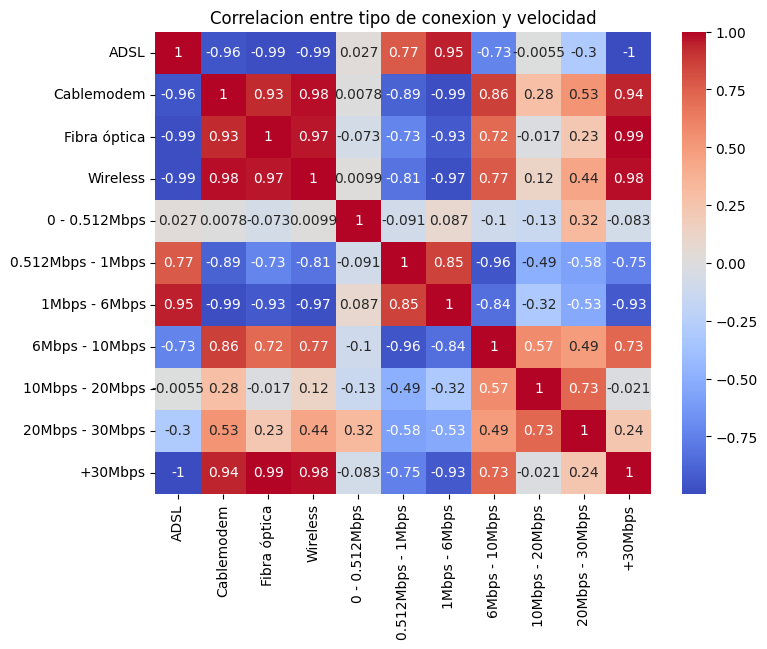

In [135]:
#Calculo matriz de correlación entre el tipo de conexion y la velocidad de navegacion
correlation_matrix = pd.concat([nat_conn_type[['ADSL','Cablemodem','Fibra óptica','Wireless']], nat_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps']]], axis=1).corr()
#Crear mapa de calor a partir de la matriz de correlacion
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlacion entre tipo de conexion y velocidad')
plt.show()

Claramente podemos observar que la mayoria de las altas correlaciones estan vinculadas a la capacidad de ancho de banda brindado por el tipo de servicio.

- Conexion ADSL: se encuentra correlacionada a las bajas velocidad.
- Cablemodem, fibra optica y wireless: se encuentran relacionadas a las altas velocidades.

Tambien podes llegar a la conclusion que con velocidad como 10Mbps a 30Mbps existe un problema de correlacion no por el hecho del tipo conexion sino por el declive de la contratacion de este servicio.

---

### Velocidad media por periodos de tiempo

`Dataframe: nat_vel_mean`

Este dataframe contiene información sobre la velocidad media de conexion que tienen los ciudadanos de la Republica Argentina, estimado en Mbps durante un periodo de tiempo.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Mbps (Media de bajada): velocidad media de conexion a internet durante un periodo de tiempo.
- Trimestre.1: trimestre detallado por meses y año especifico.

In [136]:
#Tamaño de dataframe
nat_vel_mean.shape

(33, 4)

In [137]:
#Resumen de primeros datos
nat_vel_mean.head(3)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,1,"55,11",Ene-Mar 2022
1,2021,4,"52,34",Oct-Dic 2021
2,2021,3,"48,46",Jul-Sept 2021


In [138]:
#Reemplazar ',' con '.'
nat_vel_mean['Mbps (Media de bajada)'] = nat_vel_mean['Mbps (Media de bajada)'].str.replace(',','.')

In [139]:
#Valores nulos y tipos de datos de las series
print(nat_vel_mean.isnull().sum())
print(nat_vel_mean.dtypes)

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64
Año                        int64
Trimestre                  int64
Mbps (Media de bajada)    object
Trimestre.1               object
dtype: object


In [140]:
#Transformar str a float
nat_vel_mean['Mbps (Media de bajada)'] = nat_vel_mean['Mbps (Media de bajada)'].astype(float)

In [141]:
#Eliminar columnas innecesarias
nat_vel_mean = nat_vel_mean.drop(['Trimestre','Trimestre.1'], axis=1)

In [142]:
#Agrupar datos por año promediando trimestres
nat_vel_mean = nat_vel_mean.groupby('Año').mean().reset_index()

In [143]:
nat_vel_mean.describe()

,Año,Mbps (Media de bajada)
count,9.00,9.00
mean,2018.00,22.46
std,2.74,19.95
min,2014.00,3.85
25%,2016.00,5.70
50%,2018.00,14.59
75%,2020.00,39.72
max,2022.00,55.11


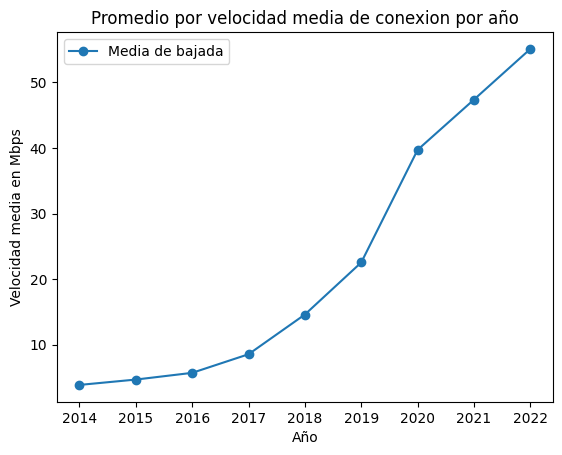

In [144]:
#Creacion de grafico de lineas
plt.plot(nat_vel_mean['Año'], nat_vel_mean['Mbps (Media de bajada)'], marker='o', linestyle='-', label='Media de bajada')
plt.xlabel('Año')
plt.ylabel('Velocidad media en Mbps')
plt.title('Promedio por velocidad media de conexion por año')
plt.legend()
plt.show()

#### Conclusion de grafico por velocidad media de conexion

`Grafico de linea que sugiere un aumento de velocidad media de conexion`

A traves de este conjunto de conclusiones, podemos dar fe en el correcto grafico creado mediante velocidades medias en los periodos de tiempo. Si bien se mantienen las velocidad bajas por varios mativos existe un gran incremento de la capacidad de consumo de ancho de banda por usuario.

Debemos apreciar que existio un pequeño sobresalto en la velocidad media entre el 2019 y el 2020, de hecho antes de este año el grafico era ligeramente creciente.<br>
De hecho son años post cuarentena donde el uso del internet se incremento por el encierro obligatorio, ya que todo el entretenimiento, educacion y otros aspecto de la vida cotidiano deberian ser digitalizados.


---